# **The Titanic Dataset Notebook** <br>
This Notebook are the results of teaching myself the standart workflow for a Data Science Challange. 

## Notebook Content
1. [Introduction](#1)
     1. [Import](#11)
     2. [Get Data](#12)
     3. [Adjustments](#13)
2. [Data Exploration](#2)
     1. [Feature Analysis](#21)
     2. [Scatter Plot](#22)
     3. [Histograms](#23)
     4. [Boxplots](#24)
     5. [Scattermatrix](#25)
     6. [Advanced Scatterplot](#26)
     7. [Violinplots](#27)
     8. [Pairplot](#28)
     9. [Jointplot](#29)
     10. [Swarmplot](#210)
     11. [Heatmap](#211)
     12. [Barplot](#212)
     13. [Factorplot](#213)
     14. [Distplot](#214)
     15. [Checking for empty entries](#215)
3. [Data Cleaning](#3)
     1. [Feature Transformation](#31)
     2. [Feature Encoding](#32)
4. [Model Deployment](#4)
     1. [Categories of ML Algorithms](#41)
     2. [Preparing Features and Targets](#42)
     3. [Accuracy and Precision](#43)
     4. [Random Forest Classifier](#44)
     5. [XGBoost](#45)
     6. [Logistic Regression](#46)
     7. [Decision Tree Regressor](#47)
     8. [Extra Tree Regressor](#48)
5. [Conclusion](#5)

<a id="1"></a>
## 1.0 Introduction

This Notebook shows a typical workflow of a data scientist. The data here is already cleaned though, which is very unusual in the real world. I wanted to use real data, to show all the algorithms in action. As a data scientist, it is very important to try out new things and test approaches, even if they sound wierd at the beginning. With this Notebook, I have a framework to tackle other problems in my private and work life and be able to get a quick glance at what I am currently facing. Feel free to use this Notebook for your own work and make sure to look at the references where I got my inspiration from. 

<a id="11"></a> 
### 1.1 Import

In [1]:
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
from pandas import get_dummies
import matplotlib as mpl
import xgboost as xgb
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import warnings
import sklearn
import scipy
import numpy
import json
import sys
import csv
import os

Check the Versions of packages

In [2]:
print('matplotlib: {}'.format(matplotlib.__version__))
print('sklearn: {}'.format(sklearn.__version__))
print('scipy: {}'.format(scipy.__version__))
print('seaborn: {}'.format(sns.__version__))
print('pandas: {}'.format(pd.__version__))
print('numpy: {}'.format(np.__version__))
print('Python: {}'.format(sys.version))

matplotlib: 2.2.3
sklearn: 0.20.3
scipy: 1.1.0
seaborn: 0.9.0
pandas: 0.23.4
numpy: 1.16.2
Python: 3.6.6 |Anaconda, Inc.| (default, Oct  9 2018, 12:34:16) 
[GCC 7.3.0]


<a id="12"></a> 
### 1.2 Get the Data to work with

In [3]:
titanic_df = pd.read_csv("../input/train.csv")
test_df    = pd.read_csv("../input/test.csv")

<a id="13"></a> 
### 1.3 Adjustments
<br>
Do some tiny adjustments to make everything prettier

In [4]:
sns.set(style='white', context='notebook', palette='deep')
pylab.rcParams['figure.figsize'] = 12,8
warnings.filterwarnings('ignore')
mpl.style.use('ggplot')
sns.set_style('white')
%matplotlib inline

<a id="2"></a>
## 2.0 Data Exploration

<a id="21"></a> 
### 2.1 Feature Analysis

Luckily the features of this dataset were described pretty descent:
* Age: Age of the person, fractional when under 1. If it is estimated, is has the following format: xx.5
* Sibsp: Counts of siblings and spouses on the ship
* Parch: Parents and/or children, some children traveled with a nanny, therefore parch=0 is still a option for very young passengers
* Pclass: Ticket class the passanger bought. 1st is upperclass, 2nd is middleclass and 3rd lowerclass
* embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
* ticket: Ticketnumber
* cabin: Cabin number
* fare: passenger fare
* sex: male of female
* name: name of passenger
* passengerID: no impact on the outcome, will be excluded

Lets take a look at sample data:

In [5]:
titanic_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
329,330,1,1,"Hippach, Miss. Jean Gertrude",female,16.0,0,1,111361,57.9792,B18,C
506,507,1,2,"Quick, Mrs. Frederick Charles (Jane Richards)",female,33.0,0,2,26360,26.0000,NaN,S
168,169,0,1,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S
840,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S
865,866,1,2,"Bystrom, Mrs. (Karolina)",female,42.0,0,0,236852,13.0000,NaN,S


<a id="22"></a> 
### 2.2 Scatter Plots

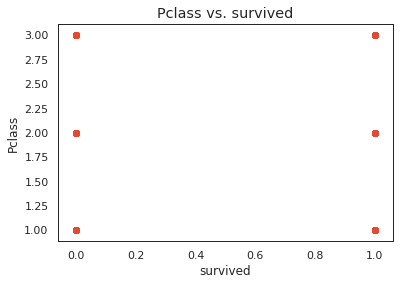

In [6]:
plt.scatter(titanic_df['Survived'], titanic_df['Pclass'])
plt.xlabel('survived')
plt.ylabel('Pclass')
plt.title('Pclass vs. survived')
plt.show()

Obviusly this is not what I wanted to see, I wanted to see how many of the different classes survived and how many did not. I need to brainstorm about how to get this though. This might be better in a histogram.
Edit: After getting to the boxplots, I think a stripplot might have been much more effective

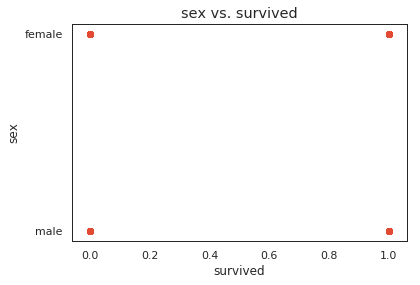

In [7]:
plt.scatter(titanic_df['Survived'], titanic_df['Sex'])
plt.xlabel('survived')
plt.ylabel('sex')
plt.title('sex vs. survived')
plt.show()

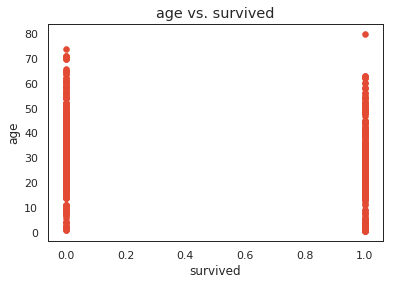

In [8]:
plt.scatter(titanic_df['Survived'], titanic_df['Age'])
plt.xlabel('survived')
plt.ylabel('age')
plt.title('age vs. survived')
plt.show()

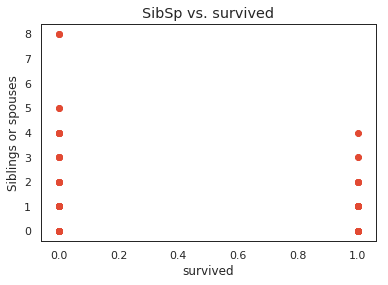

In [9]:
plt.scatter(titanic_df['Survived'], titanic_df['SibSp'])
plt.xlabel('survived')
plt.ylabel('Siblings or spouses')
plt.title('SibSp vs. survived')
plt.show()

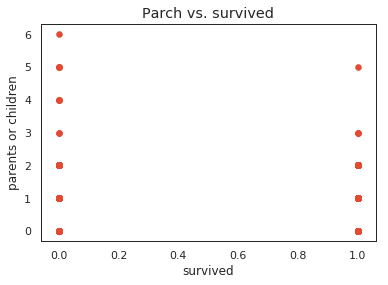

In [10]:
plt.scatter(titanic_df['Survived'], titanic_df['Parch'])
plt.xlabel('survived')
plt.ylabel('parents or children')
plt.title('Parch vs. survived')
plt.show()

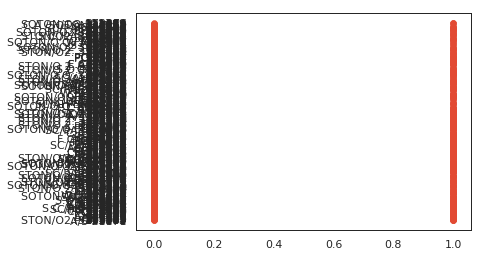

In [11]:
plt.scatter(titanic_df['Survived'], titanic_df['Ticket']) #obviously not a good idea,  because every ticket is unique, but for fun I will try it 
plt.show()

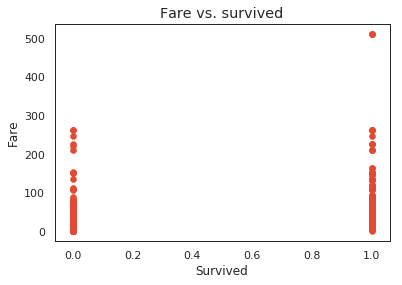

In [12]:
plt.scatter(titanic_df['Survived'], titanic_df['Fare'])
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.title('Fare vs. survived')
plt.show()

In [13]:
#plt.scatter(titanic_df['Survived'], titanic_df['Cabin'])
#This does not work, because Cabins are not only numbers but strings like 'C52'

In [14]:
#plt.scatter(titanic_df['Survived'], titanic_df['Embarked']) 62, 830
#This will need some data cleaning before it works (Nan to 0, C/Q/S to 1/2/3)

<a id="23"></a> 
### 2.3 Histograms

<Figure size 432x288 with 0 Axes>

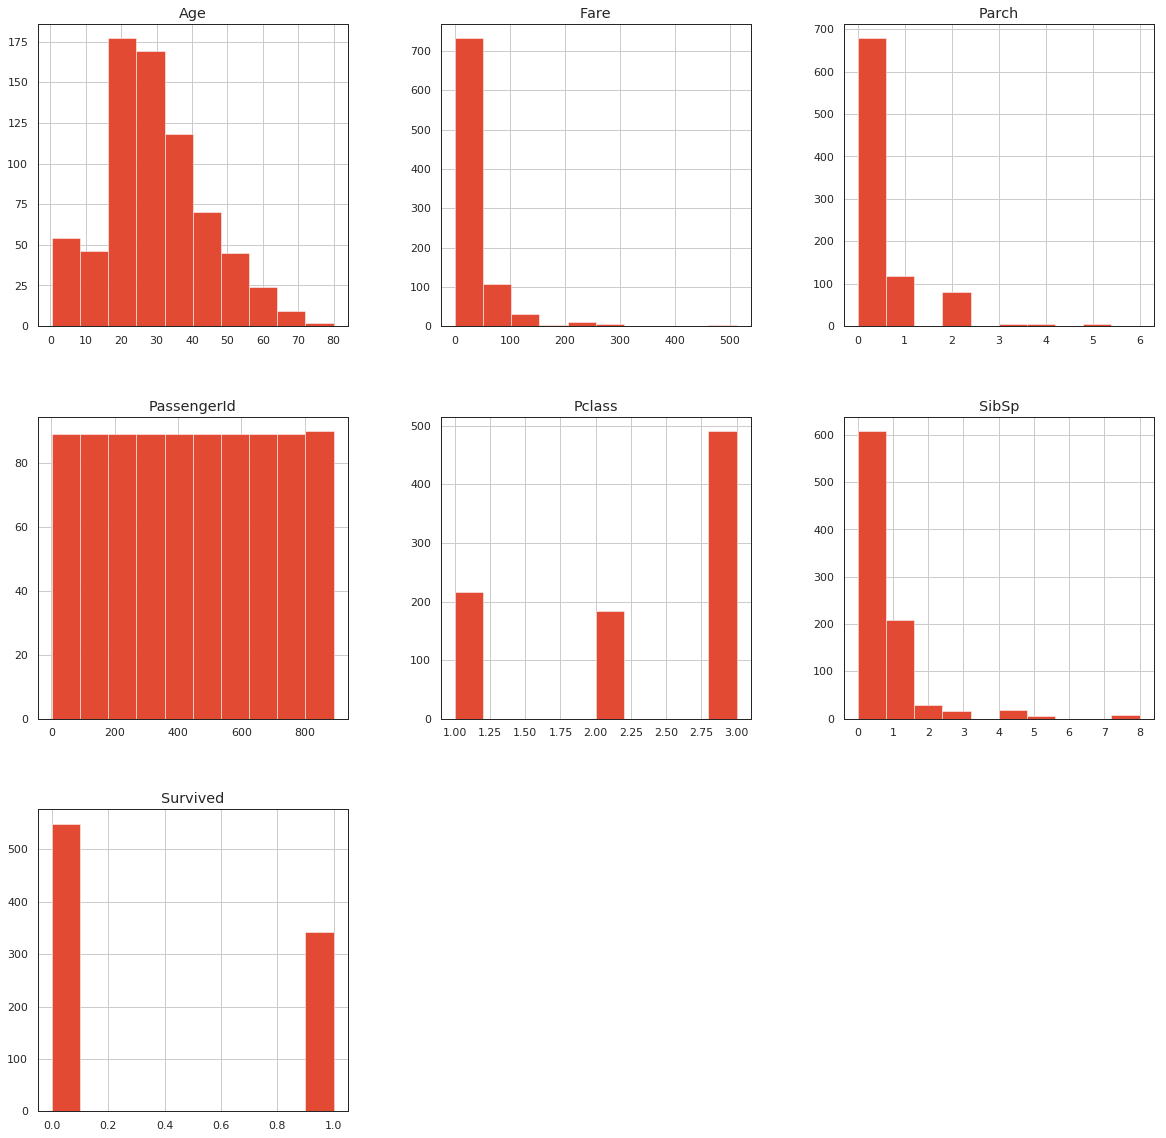

<Figure size 432x288 with 0 Axes>

In [15]:
titanic_df.hist(figsize=(20,20))
plt.figure()

Looking for a gaussian distribution, the age histogramm is getting our attention. We should take a closer look at it

Lets split the histogramm into survived and not survived

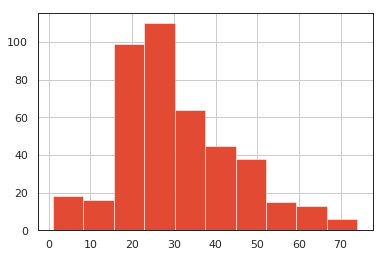

In [16]:
noSurvivor = titanic_df[titanic_df['Survived']==0]
noSurvivor['Age'].hist()


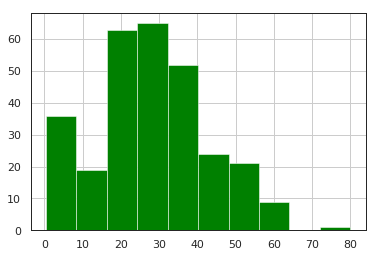

In [17]:
allSurvivor = titanic_df[titanic_df['Survived']==1]
allSurvivor['Age'].hist(color='green')


There seems to be a difference, especially very jung people had a better chance at survival as it seems. Still make sure to pay attention to the different scales of those two histograms!

Now lets see how many people even survived vs the amount who did not.

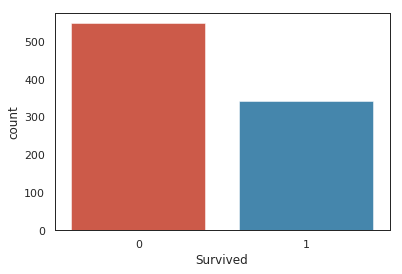

In [18]:
sns.countplot('Survived', data=titanic_df)

Now lets see how the sex played a role in the chance of survival you get.

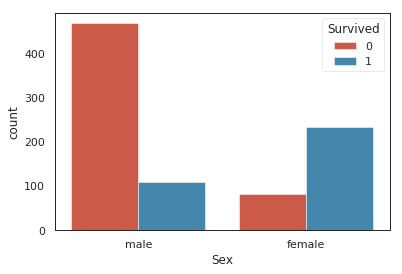

In [19]:
sns.countplot('Sex', hue='Survived', data=titanic_df)

And lets see if it is important on how rich you are

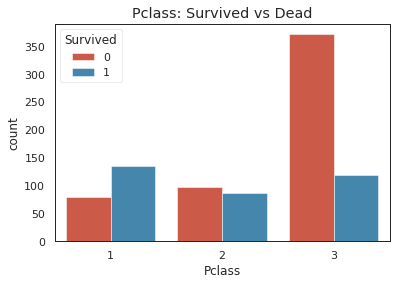

In [20]:
sns.countplot('Pclass', hue='Survived', data=titanic_df)
plt.title('Pclass: Survived vs Dead')
plt.show()

<a id="24"></a> 
### 2.4 Boxplots

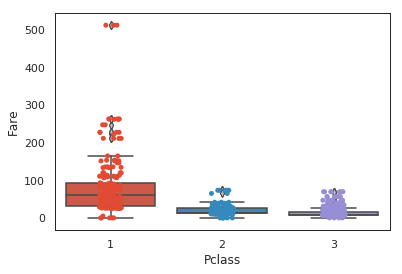

In [21]:
flierprops = dict(markerfacecolor='0.75', markersize=5, linestyle='none') #make outliers in the boxplot grey instead of a normal color
sns.boxplot(x='Pclass', y='Fare', data=titanic_df, flierprops = flierprops)
sns.stripplot(x='Pclass', y='Fare', data=titanic_df, jitter=True, edgecolor='gray')

Wie man sehen kann, sorgen ein paar wenige Fares im oberen Bereich für ein sehr starkes auseinanderziehen des Graphen.

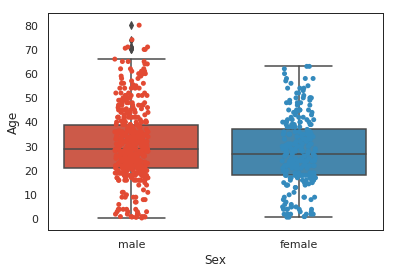

In [22]:
sns.boxplot(x='Sex', y='Age', data=titanic_df)
sns.stripplot(x='Sex', y='Age', data=titanic_df, jitter=True, edgecolor='gray')

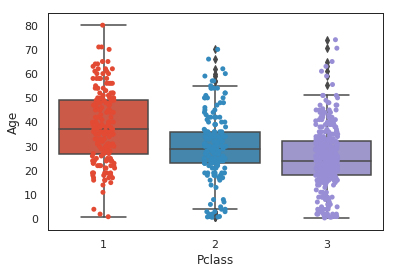

In [23]:
ax= sns.boxplot(x="Pclass", y="Age", data=titanic_df)
ax= sns.stripplot(x="Pclass", y="Age", data=titanic_df, jitter=True, edgecolor="gray")
plt.show()

<a id="25"></a> 
### 2.5 Scattermatrix

<Figure size 432x288 with 0 Axes>

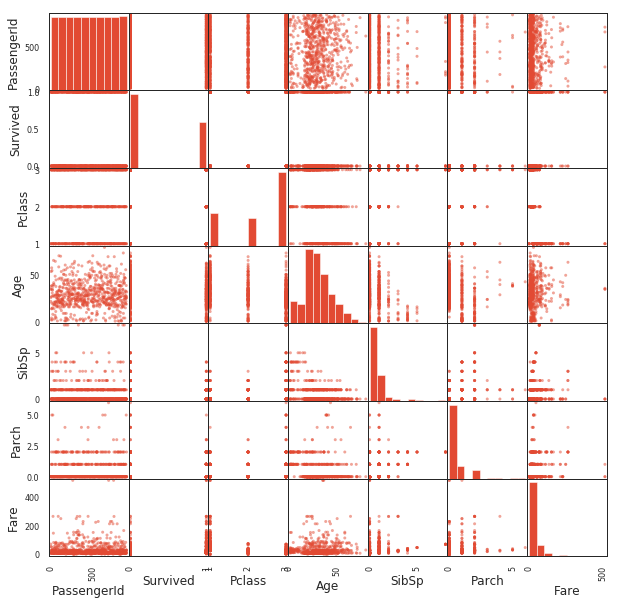

<Figure size 432x288 with 0 Axes>

In [24]:
pd.plotting.scatter_matrix(titanic_df, figsize=(10,10))
plt.figure()


Goal is to find correlations and predictable relationsships. Loog for diagonal grouping.

<a id="26"></a> 
### 2.6 Advanced Scatterplots

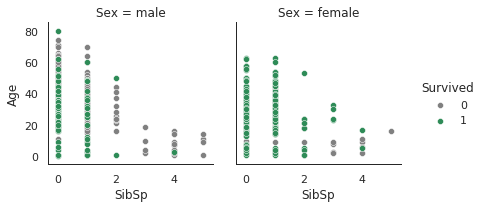

In [25]:
g = sns.FacetGrid(titanic_df, hue="Survived", col="Sex", margin_titles=True, palette={1:"seagreen", 0:"gray"})
g = g.map(plt.scatter, "SibSp", "Age", edgecolor="w").add_legend()

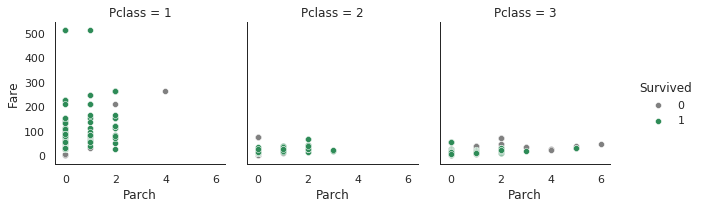

In [26]:
g = sns.FacetGrid(titanic_df, hue="Survived", col="Pclass", margin_titles=True, palette={1:"seagreen", 0:"gray"})
g = g.map(plt.scatter, "Parch", "Fare", edgecolor="w").add_legend()

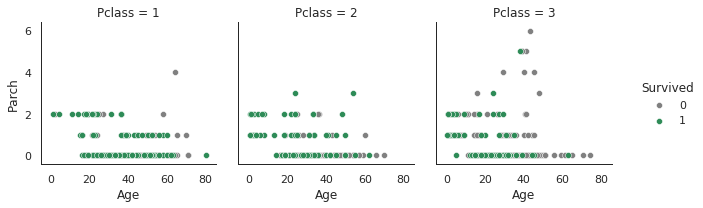

In [27]:
g = sns.FacetGrid(titanic_df, hue="Survived", col="Pclass", margin_titles=True, palette={1:"seagreen", 0:"gray"})
g = g.map(plt.scatter, "Age", "Parch", edgecolor="w").add_legend()

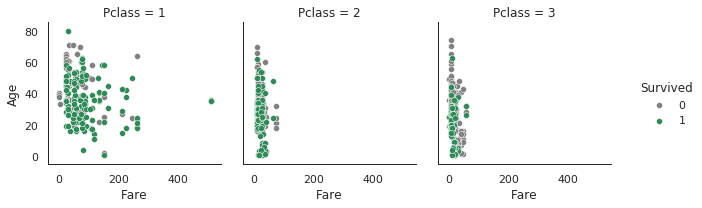

In [28]:
g = sns.FacetGrid(titanic_df, hue="Survived", col="Pclass", margin_titles=True,
                  palette={1:"seagreen", 0:"gray"})
g=g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend();

<a id="27"></a> 
### 2.7 Boxplots

Violinplots are good for comparing values where one or two are categorical and one is numerical

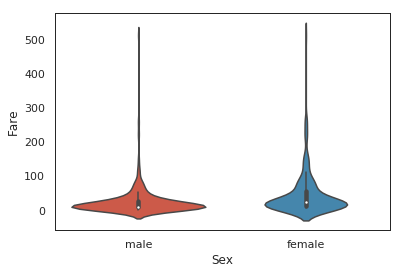

In [29]:
sns.violinplot(data=titanic_df, x="Sex", y="Fare")

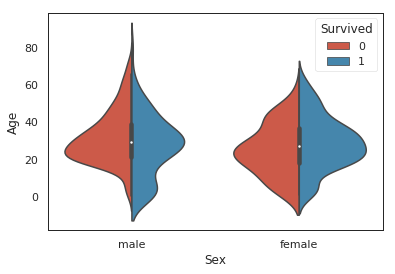

In [30]:
sns.violinplot(data=titanic_df, x="Sex", y="Age", hue="Survived", split=True)

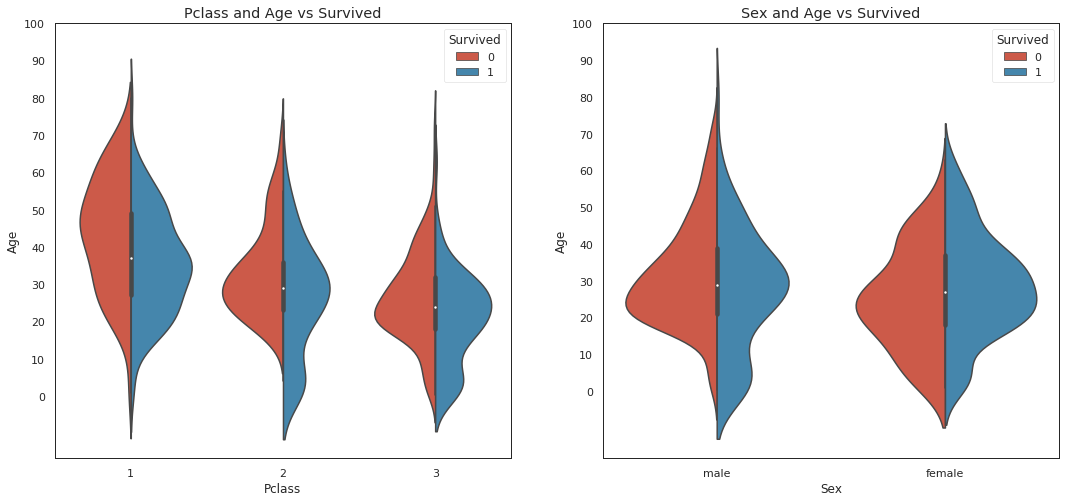

In [31]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=titanic_df,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=titanic_df,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

<a id="28"></a> 
### 2.8 Pairplot

A pairplot is good to get an overview of paires of features, like a scattermatrix. But you can differenciate between one categorical value

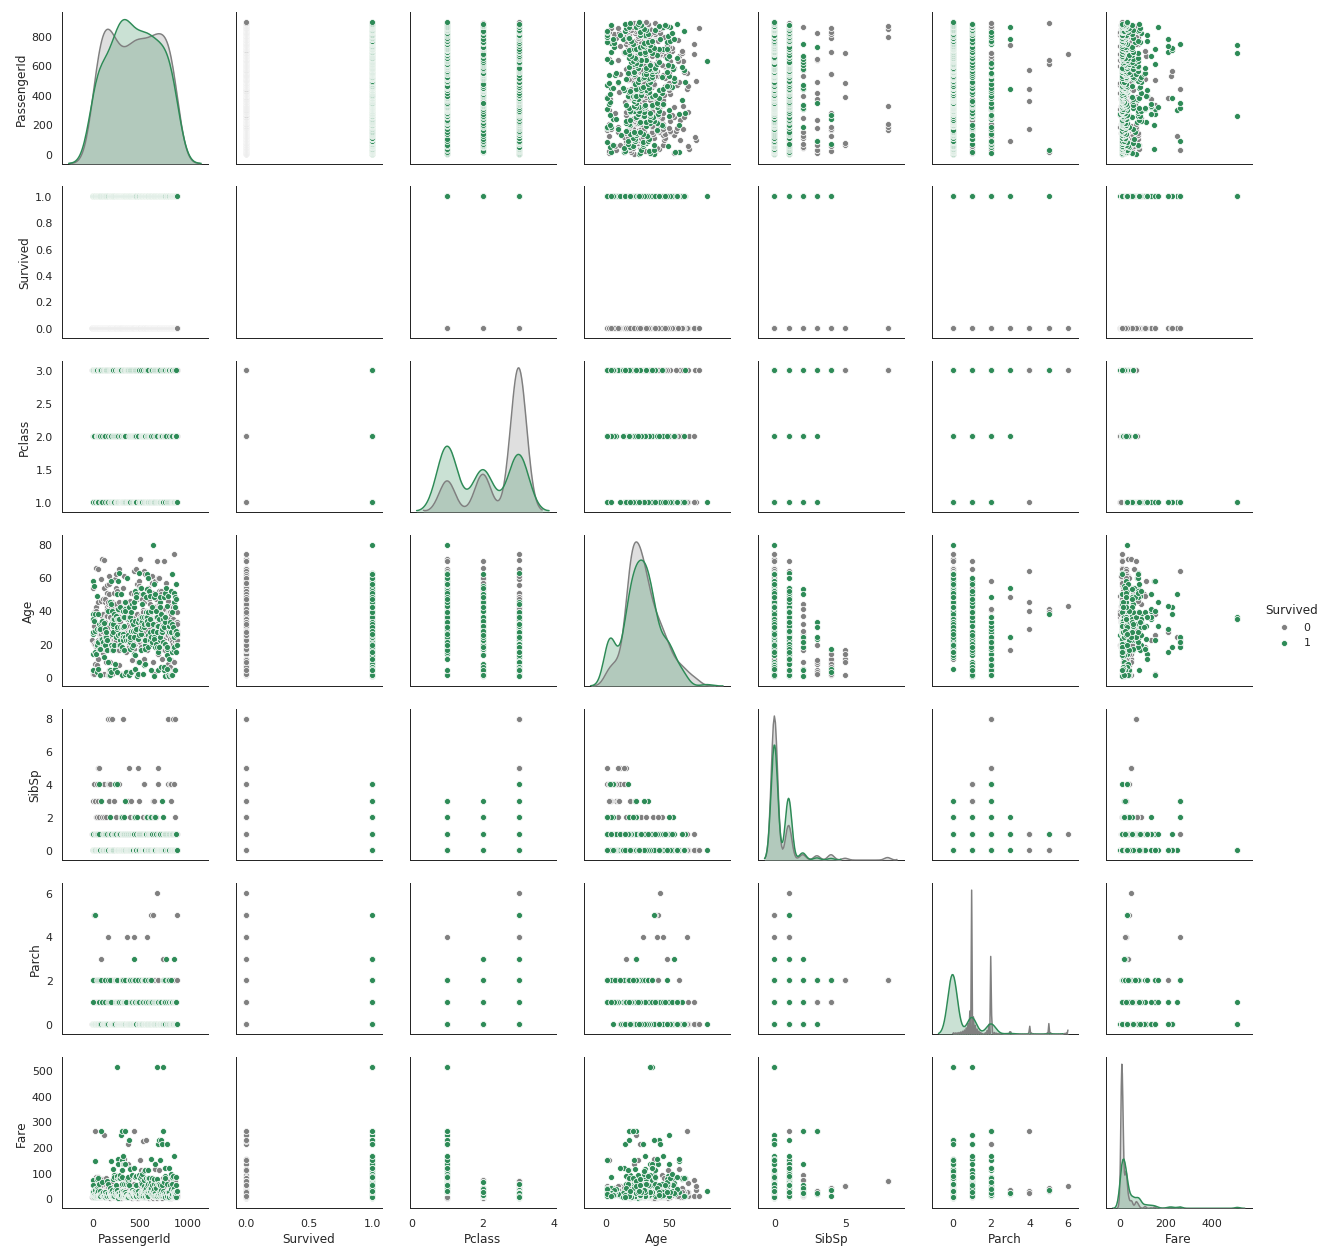

In [32]:
sns.pairplot(titanic_df, hue="Survived", palette={1:"Seagreen", 0:"Grey"})

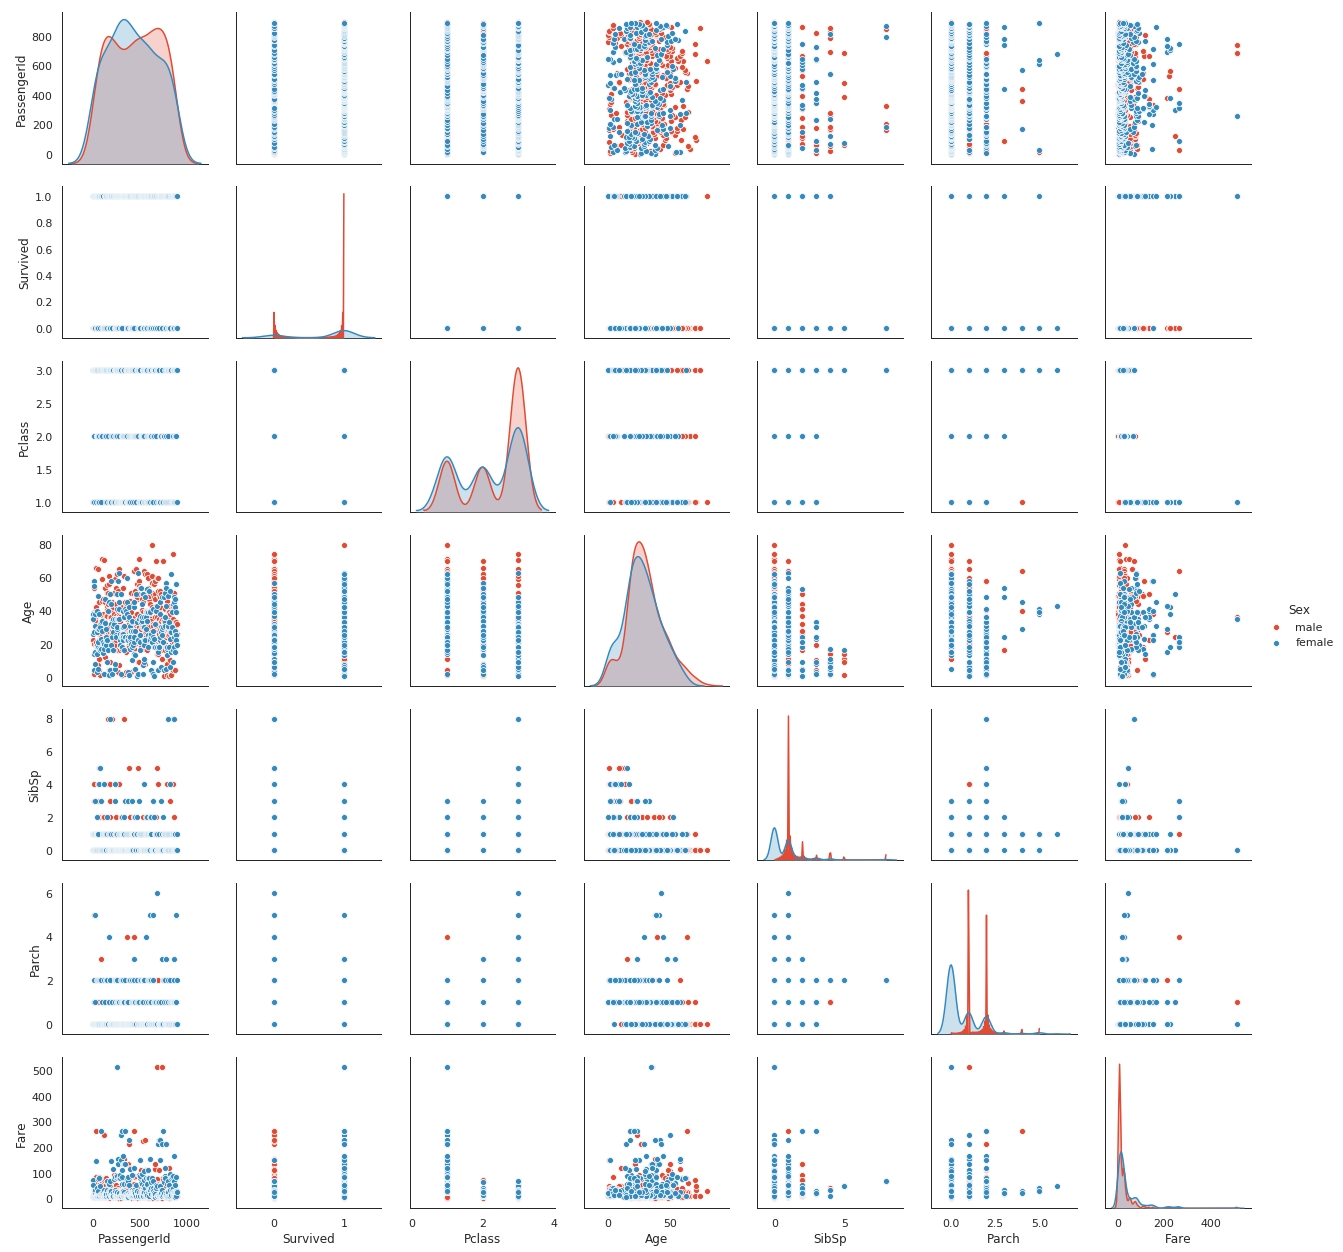

In [33]:
sns.pairplot(titanic_df, hue="Sex")

<a id="29"></a> 
### 2.9 Jointplot

Good for showing relationships between two numerical features, aswell as how the distribution of those values in general are 

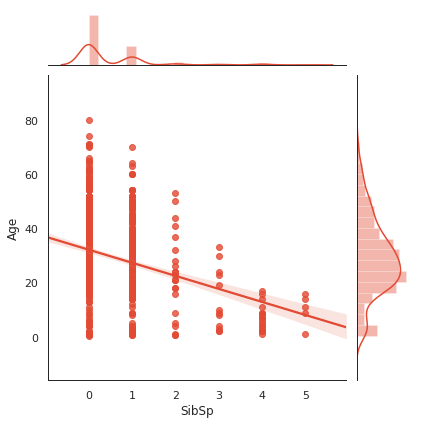

In [34]:
sns.jointplot(x='SibSp', y='Age', data=titanic_df, kind='reg')

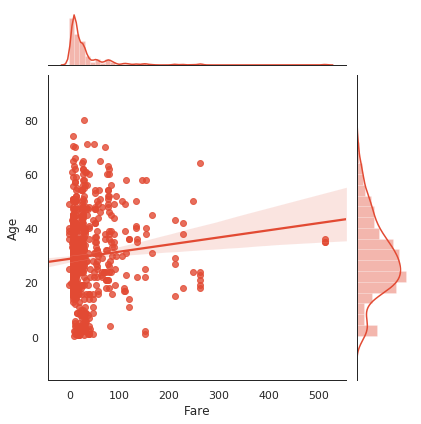

In [35]:
sns.jointplot(x='Fare', y='Age', data=titanic_df, kind='reg')

<a id="210"></a> 
### 2.10 Swarmplot

A swarmplot is good for showing how many datapoints are in there in a relationship of categorical vs. numerical 

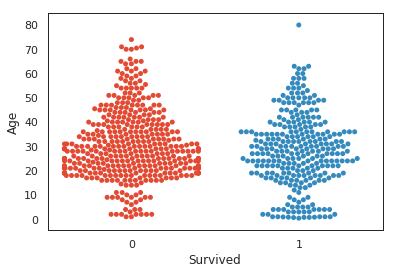

In [36]:
sns.swarmplot(x='Survived', y="Age", data=titanic_df)

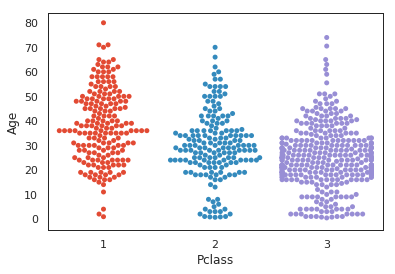

In [37]:
sns.swarmplot(x='Pclass',y='Age',data=titanic_df)

<a id="211"></a> 
### 2.11 Heatmap

A heatmap can show, if there is any kind of correlation between two of the features of the dataset

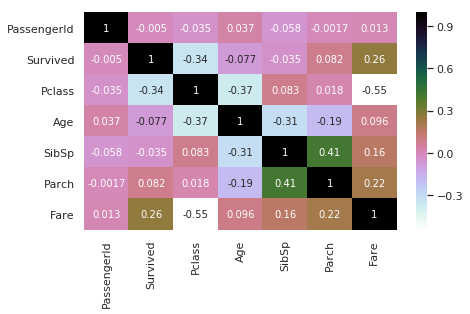

In [38]:
plt.figure(figsize=(7, 4))
sns.heatmap(titanic_df.corr(), annot=True, cmap='cubehelix_r') #draws a heatmap with the input as the correlation matrix calculated with iris.corr()
plt.show()

<a id="212"></a> 
### 2.12 Barplot

A barplot can show you the amount of datapoints in relation to a specific categorical feature
See also: sns.countplot

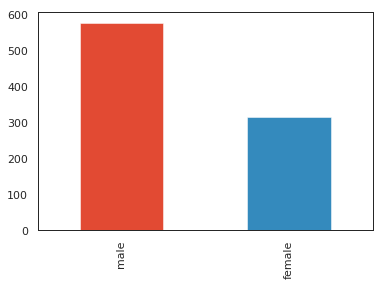

In [39]:
titanic_df['Sex'].value_counts().plot(kind="bar")

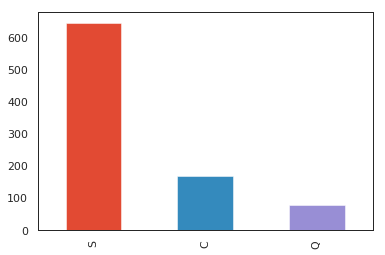

In [40]:
titanic_df['Embarked'].value_counts().plot(kind="bar")

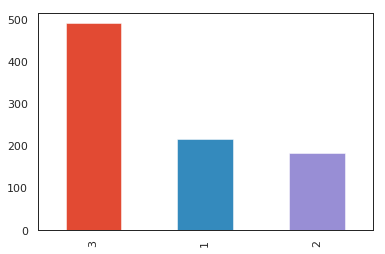

In [41]:
titanic_df['Pclass'].value_counts().plot(kind="bar")

<a id="213"></a> 
### 2.13 Factorplot

A Factorplot shows how much variation is in a numerical feature split in one or two categorical features

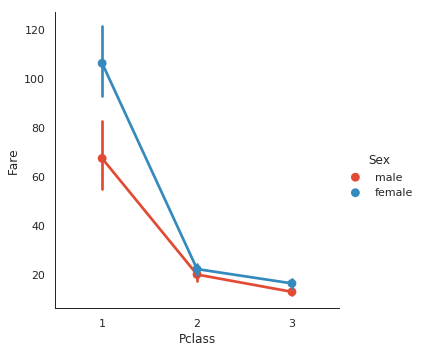

In [42]:
sns.factorplot('Pclass', 'Fare', hue='Sex', data=titanic_df)
plt.show()

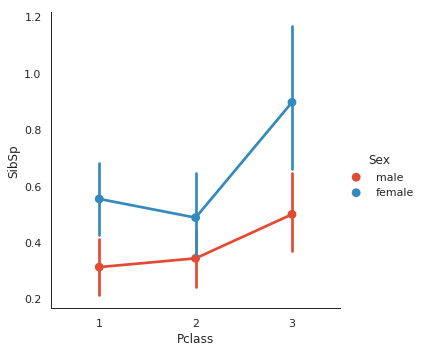

In [43]:
sns.factorplot('Pclass', 'SibSp', hue='Sex', data=titanic_df)
plt.show()

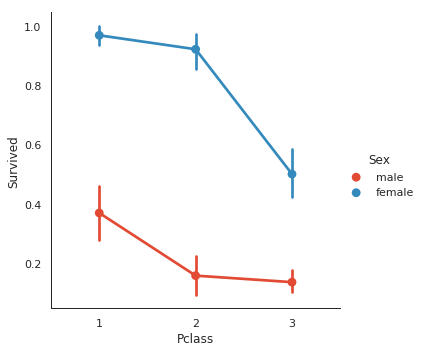

In [44]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=titanic_df)
plt.show()

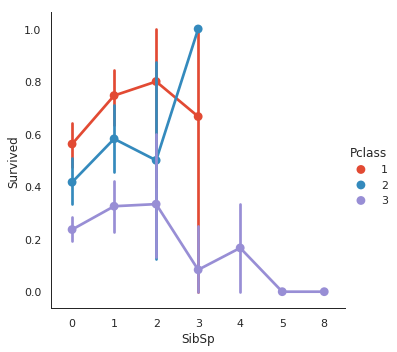

In [45]:
sns.factorplot('SibSp', 'Survived', hue='Pclass', data=titanic_df)
plt.show()

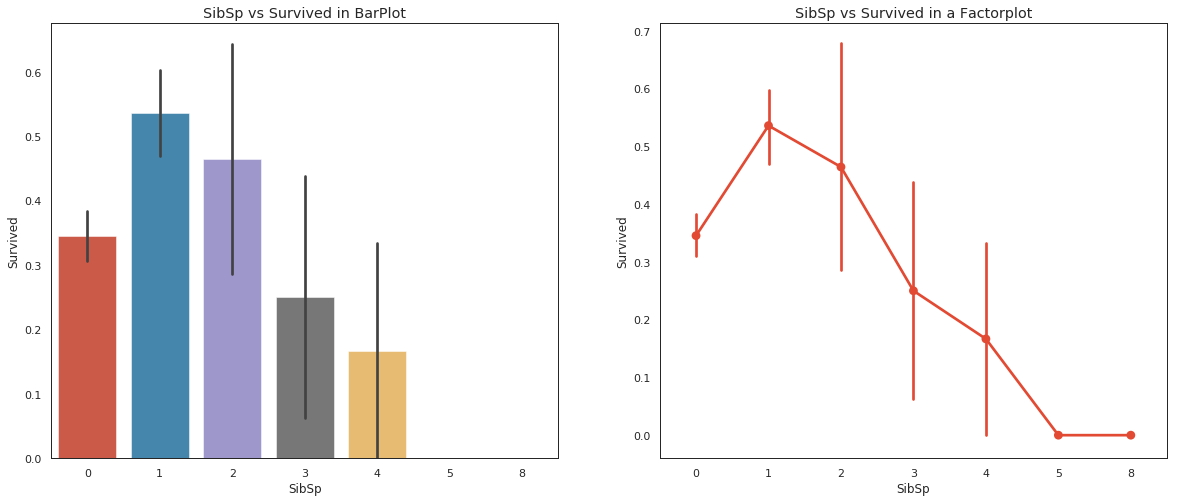

In [46]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp', 'Survived', data=titanic_df, ax=ax[0])
ax[0].set_title('SibSp vs Survived in BarPlot')
sns.factorplot('SibSp', 'Survived', data=titanic_df, ax=ax[1])
ax[1].set_title('SibSp vs Survived in a Factorplot')
plt.close(2)
plt.show()

<a id="214"></a> 
### 2.14 Distplot

Shows how many Datapoins contribute to one numerical feature

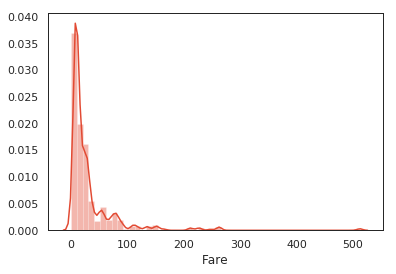

In [47]:
sns.distplot(titanic_df.Fare)

Text(0.5,1,'Fares in Pclass 3')

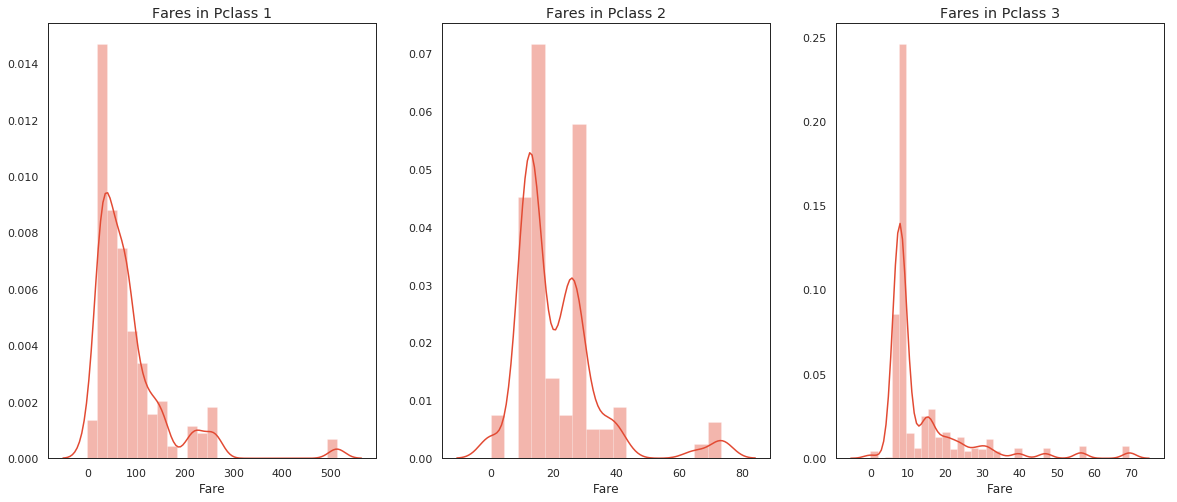

In [48]:
f, ax=plt.subplots(1, 3, figsize=(20, 8))
sns.distplot(titanic_df[titanic_df['Pclass']==1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(titanic_df[titanic_df['Pclass']==2].Fare, ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(titanic_df[titanic_df['Pclass']==3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass 3')

<a id="215"></a> 
### 2.15 Checking for empty entries
It is very helpful to know where entires are missing and what needs to be filled before we can start with training our first model. This function helps us to get an overview over our data.

In [49]:
def check_missing_data(df):
    flag=df.isna().sum().any()
    if flag==True:
        total = df.isnull().sum()
        percent = (df.isnull().sum())/(df.isnull().count()*100)
        output = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
        data_type = []
        # written by MJ Bahmani
        for col in df.columns:
            dtype = str(df[col].dtype)
            data_type.append(dtype)
        output['Types'] = data_type
        return(np.transpose(output))
    else:
        return(False)

In [50]:
check_missing_data(titanic_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Total,0,0,0,0,0,177,0,0,0,0,687,2
Percent,0,0,0,0,0,0.00198653,0,0,0,0,0.00771044,2.24467e-05
Types,int64,int64,int64,object,object,float64,int64,int64,object,float64,object,object


<a id="3"></a>
## 3.0 Data Cleaning

Data Cleaning is a technique used to format raw data into a usable data set. Most algorithms work very well with numbers and not so well with strings for example. Most of the datasets you see in real life will have outliers, empty entries and probably even false data. A data scientist will probably spend most of his time solving this issues and getting to know the data. Here are just some steps which are included in the data cleaning process:
* removing Taget column (id)
* Sampling (without replacement)
* Dealing with Imbalanced Data
* Introducing missing values and treating them (f.e. replacing them with 0, the average value, etc.)
* Noise filtering
* Data discretization
* Normalization and standardization
* PCA analysis
* Feature selection (filter, embedded, wrapper)

<a id="31"></a>
### 3.1 Feature Transformation

To simplify the data, we can transform some features into simple categorical data. We want to do this with the age and the fare. Also we want to deal with empty values for the cabin number and split the name.

In [51]:
#Using the pd.cut() method, we are able to turn numerical features into categorical ones with just a couple lines of code
def simplify_ages(df):
    df.Age = df.Age.fillna(-0.5)
    bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
    group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
    categories = pd.cut(df.Age, bins, labels=group_names)
    df.Age = categories
    return df

#Fill empty entries with the letter N and cut off every other Number after the first Letter, which is probably an indication for the level of the cabin
def simplify_cabins(df):
    df.Cabin = df.Cabin.fillna('N')
    df.Cabin = df.Cabin.apply(lambda x: x[0])
    return df

#Using the pd.cut() method again, pretty self explanatory but I think it is awesome
def simplify_fares(df):
    df.Fare = df.Fare.fillna(-0.5)
    bins = (-1, 0, 8, 15, 31, 1000)
    group_names = ['Unknown', '1_quartile', '2_quartile', '3_quartile', '4_quartile']
    categories = pd.cut(df.Fare, bins, labels=group_names)
    df.Fare = categories
    return df

#Splitting the Name into LastName and NamePrefix
def format_name(df):
    df['Lname'] = df.Name.apply(lambda x: x.split(' ')[0])
    df['NamePrefix'] = df.Name.apply(lambda x: x.split(' ')[1])
    return df

#Lets drop the features we don't need for predicting life and death
def drop_features(df):
    return df.drop(['Ticket', 'Name', 'Embarked'], axis=1)

#Putting it all together for easy access
def transform_features(df):
    df = simplify_ages(df)
    df = simplify_cabins(df)
    df = simplify_fares(df)
    df = format_name(df)
    df = drop_features(df)
    return df


titanic_df = transform_features(titanic_df)
test_df = transform_features(test_df)
titanic_df.head()
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
0,892,3,male,Young Adult,0,0,1_quartile,N,"Kelly,",Mr.
1,893,3,female,Adult,1,0,1_quartile,N,"Wilkes,",Mrs.
2,894,2,male,Senior,0,0,2_quartile,N,"Myles,",Mr.
3,895,3,male,Young Adult,0,0,2_quartile,N,"Wirz,",Mr.
4,896,3,female,Student,1,1,2_quartile,N,"Hirvonen,",Mrs.


<a id="32"></a>
### 3.2 Feature Encoding
Most of the machine learning algorithms like to work with numbers. However, there are often a lot of categorical features, which are not numbers (f.e. Cabin, Sex, Name). To be able to use them for our algorithms, it is a good idea to encode them into numerical features. We will use the [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) in that example to normalize and transform our categorical features.

In [52]:
#takes both dataframes (train and test) and encodes the features defined as features variable
def encode_features(titanic_df, test_df):
    #define features here
    features = ['Fare', 'Cabin', 'Age', 'Sex', 'Lname', 'NamePrefix']
    
    #combine both dataframes
    df_combined = pd.concat([titanic_df[features], test_df[features]])
    
    #loop over features
    for feature in features:
        #create instance of an LabelEncoder
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        titanic_df[feature] = le.transform(titanic_df[feature])
        test_df[feature] = le.transform(test_df[feature])
    return titanic_df, test_df

In [53]:
titanic_df, test_df = encode_features(titanic_df, test_df)

In [54]:
titanic_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
0,1,0,3,1,4,1,0,0,7,100,19
1,2,1,1,0,0,1,0,3,2,182,20
2,3,1,3,0,7,0,0,0,7,329,16
3,4,1,1,0,7,1,0,3,2,267,20
4,5,0,3,1,7,0,0,1,7,15,19


<a id="4"></a>
## 4.0 Model Deployment

In this section a lot of different learning algorithms were applied to the dataset. What algorithm you want and need for your problem, depends on the features and targets you have. It is never a bad idea to try out different things though. 

<a id="41"></a>
### 4.1 Categories of ML algorithms

ML algorithms are categorized into the type of learning they are applicable for. 
* Classification
    * Linear Regression
    * k-Nearest Neighbors
    * Support Vector Machines
    * Decision Trees
    * Neural Networks
* Clustering
    * K-means
    * HCA
    * Expected Maximization
* Visualization and dimension reduction
    * Principal Component Analysis (PCA)
    * Locally-Linear Embedding (LLE)
    * t-distributed Stochastic Neighbor Embedding (t-SNE)
* Association rule Learning
    * Apriori
    * Exlat
* Semisupervised Learning
* Reinforcement Learning
    * Q-learning
* Batch learning & online learning
* Ensemble Learning

<a id="42"></a>
### 4.2 Preparing Features and Targets
Seperating the encoded dataset into features and tragets to be able to work with them easily. This has to be done with both the train dataset and the test dataset.

In [55]:
x_all = titanic_df.drop(['Survived', 'PassengerId'], axis=1)
y_all = titanic_df['Survived']

In [56]:
num_test = 0.3
X_train, X_test, y_train, y_test = train_test_split(x_all, y_all, test_size=num_test, random_state=100)

<a id="43"></a>
### 4.3 Accuracy and precision
TODO: Research

<a id="44"></a>
### 4.4 RandomForestClassifier

A random forest uses a number of different decision trees on various sub-samples and uses averaging to improve the predictive accuracy and reduce overfitting. 

In [57]:
# Choose the type of classifier
rfc = RandomForestClassifier()

# Choose some parameter combinations to try
parameters = {'n_estimators': [4, 6, 9],
              'max_features': ['log2', 'sqrt', 'auto'],
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10],
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1, 5, 8]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(rfc, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rfc = grid_obj.best_estimator_

rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=4, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Get the score

In [58]:
rfc_prediction = rfc.predict(X_test)
rfc_score=accuracy_score(y_test, rfc_prediction)
print(rfc_score)

0.7947761194029851


<a id="45"></a>
### 4.5 XGBoost
[XGBoost](https://en.wikipedia.org/wiki/XGBoost) is an open-source software library which provides a gradient boosting framework for C++, Java, Python, R, and Julia. it aims to provide a "Scalable, Portable and Distributed Gradient Boosting (GBM, GBRT, GBDT) Library". 

In [59]:
xgboost = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05).fit(X_train, y_train)

Get the score

In [60]:
xgb_prediction = xgboost.predict(X_test)
xgb_score=accuracy_score(y_test, xgb_prediction)
print(xgb_score)

0.8134328358208955


<a id="46"></a>
### 4.6 Logistic Regression
Logistic regression is one of the most used statistical models. In its basic form, it uses a logistic function to model a binary dependent variable.

In [61]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Get the score

In [62]:
logreg_prediction = logreg.predict(X_test)
logreg_score = accuracy_score(y_test, logreg_prediction)
print(logreg_score)

0.7947761194029851


<a id="47"></a>
### 4.7 DecisionTreeRegressor

In [63]:
from sklearn.tree import DecisionTreeRegressor

#Define model. Specify a number for random_state to ensure same results each run
dt = DecisionTreeRegressor(random_state=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

Get the score

In [64]:
dt_prediction = dt.predict(X_test)
dt_score=accuracy_score(y_test, dt_prediction)
print(dt_score)

0.7835820895522388


<a id="48"></a>
### 4.8 ExtraTreeRegressor
Extra Tree Regressor differ from classic decision trees in the way they are built. When loogin for the best split to separate the samples of a node into two groups, random splits are drawn for each of the max_features randomly selected features and tthe best split among those is chosen. When max_features is set 1, this amounts to building a totally random decision tree. 

In [65]:
from sklearn.tree import ExtraTreeRegressor
# Define mode. Specify a number for random_state to ensure same results
etr = ExtraTreeRegressor()
etr.fit(X_train, y_train)

ExtraTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
          max_leaf_nodes=None, min_impurity_decrease=0.0,
          min_impurity_split=None, min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, random_state=None,
          splitter='random')

Get the score

In [66]:
etr_prediction = etr.predict(X_test)
etr_score = accuracy_score(y_test, etr_prediction)
print(etr_score)

0.7798507462686567


<a id="5"></a>
## 5.0 Submitting

Navigate to the Output tab of the Kernel and "Submit to Competition"

In [67]:
X_train = titanic_df.drop('Survived', axis=1)
y_train = titanic_df['Survived']

X_train = X_train.drop('PassengerId', axis=1)
X_test = test_df.drop('PassengerId', axis=1)

xgboost = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05).fit(X_train, y_train)

Y_pred = xgboost.predict(X_test)

You can change your model and submit the results of other models

In [68]:
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': Y_pred
})
submission.to_csv('submission.csv', index=False)